In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [55]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [56]:
total_df = pd.concat([train_df, test_df], axis=0, sort=False)
total_df.drop("ID", axis=1, inplace=True)

total_df.shape

(240000, 63)

In [57]:
train_df['Fraud_Type'].value_counts()

Fraud_Type
m    118800
a       100
j       100
h       100
k       100
c       100
g       100
i       100
b       100
f       100
d       100
e       100
l       100
Name: count, dtype: int64

범주형 데이터

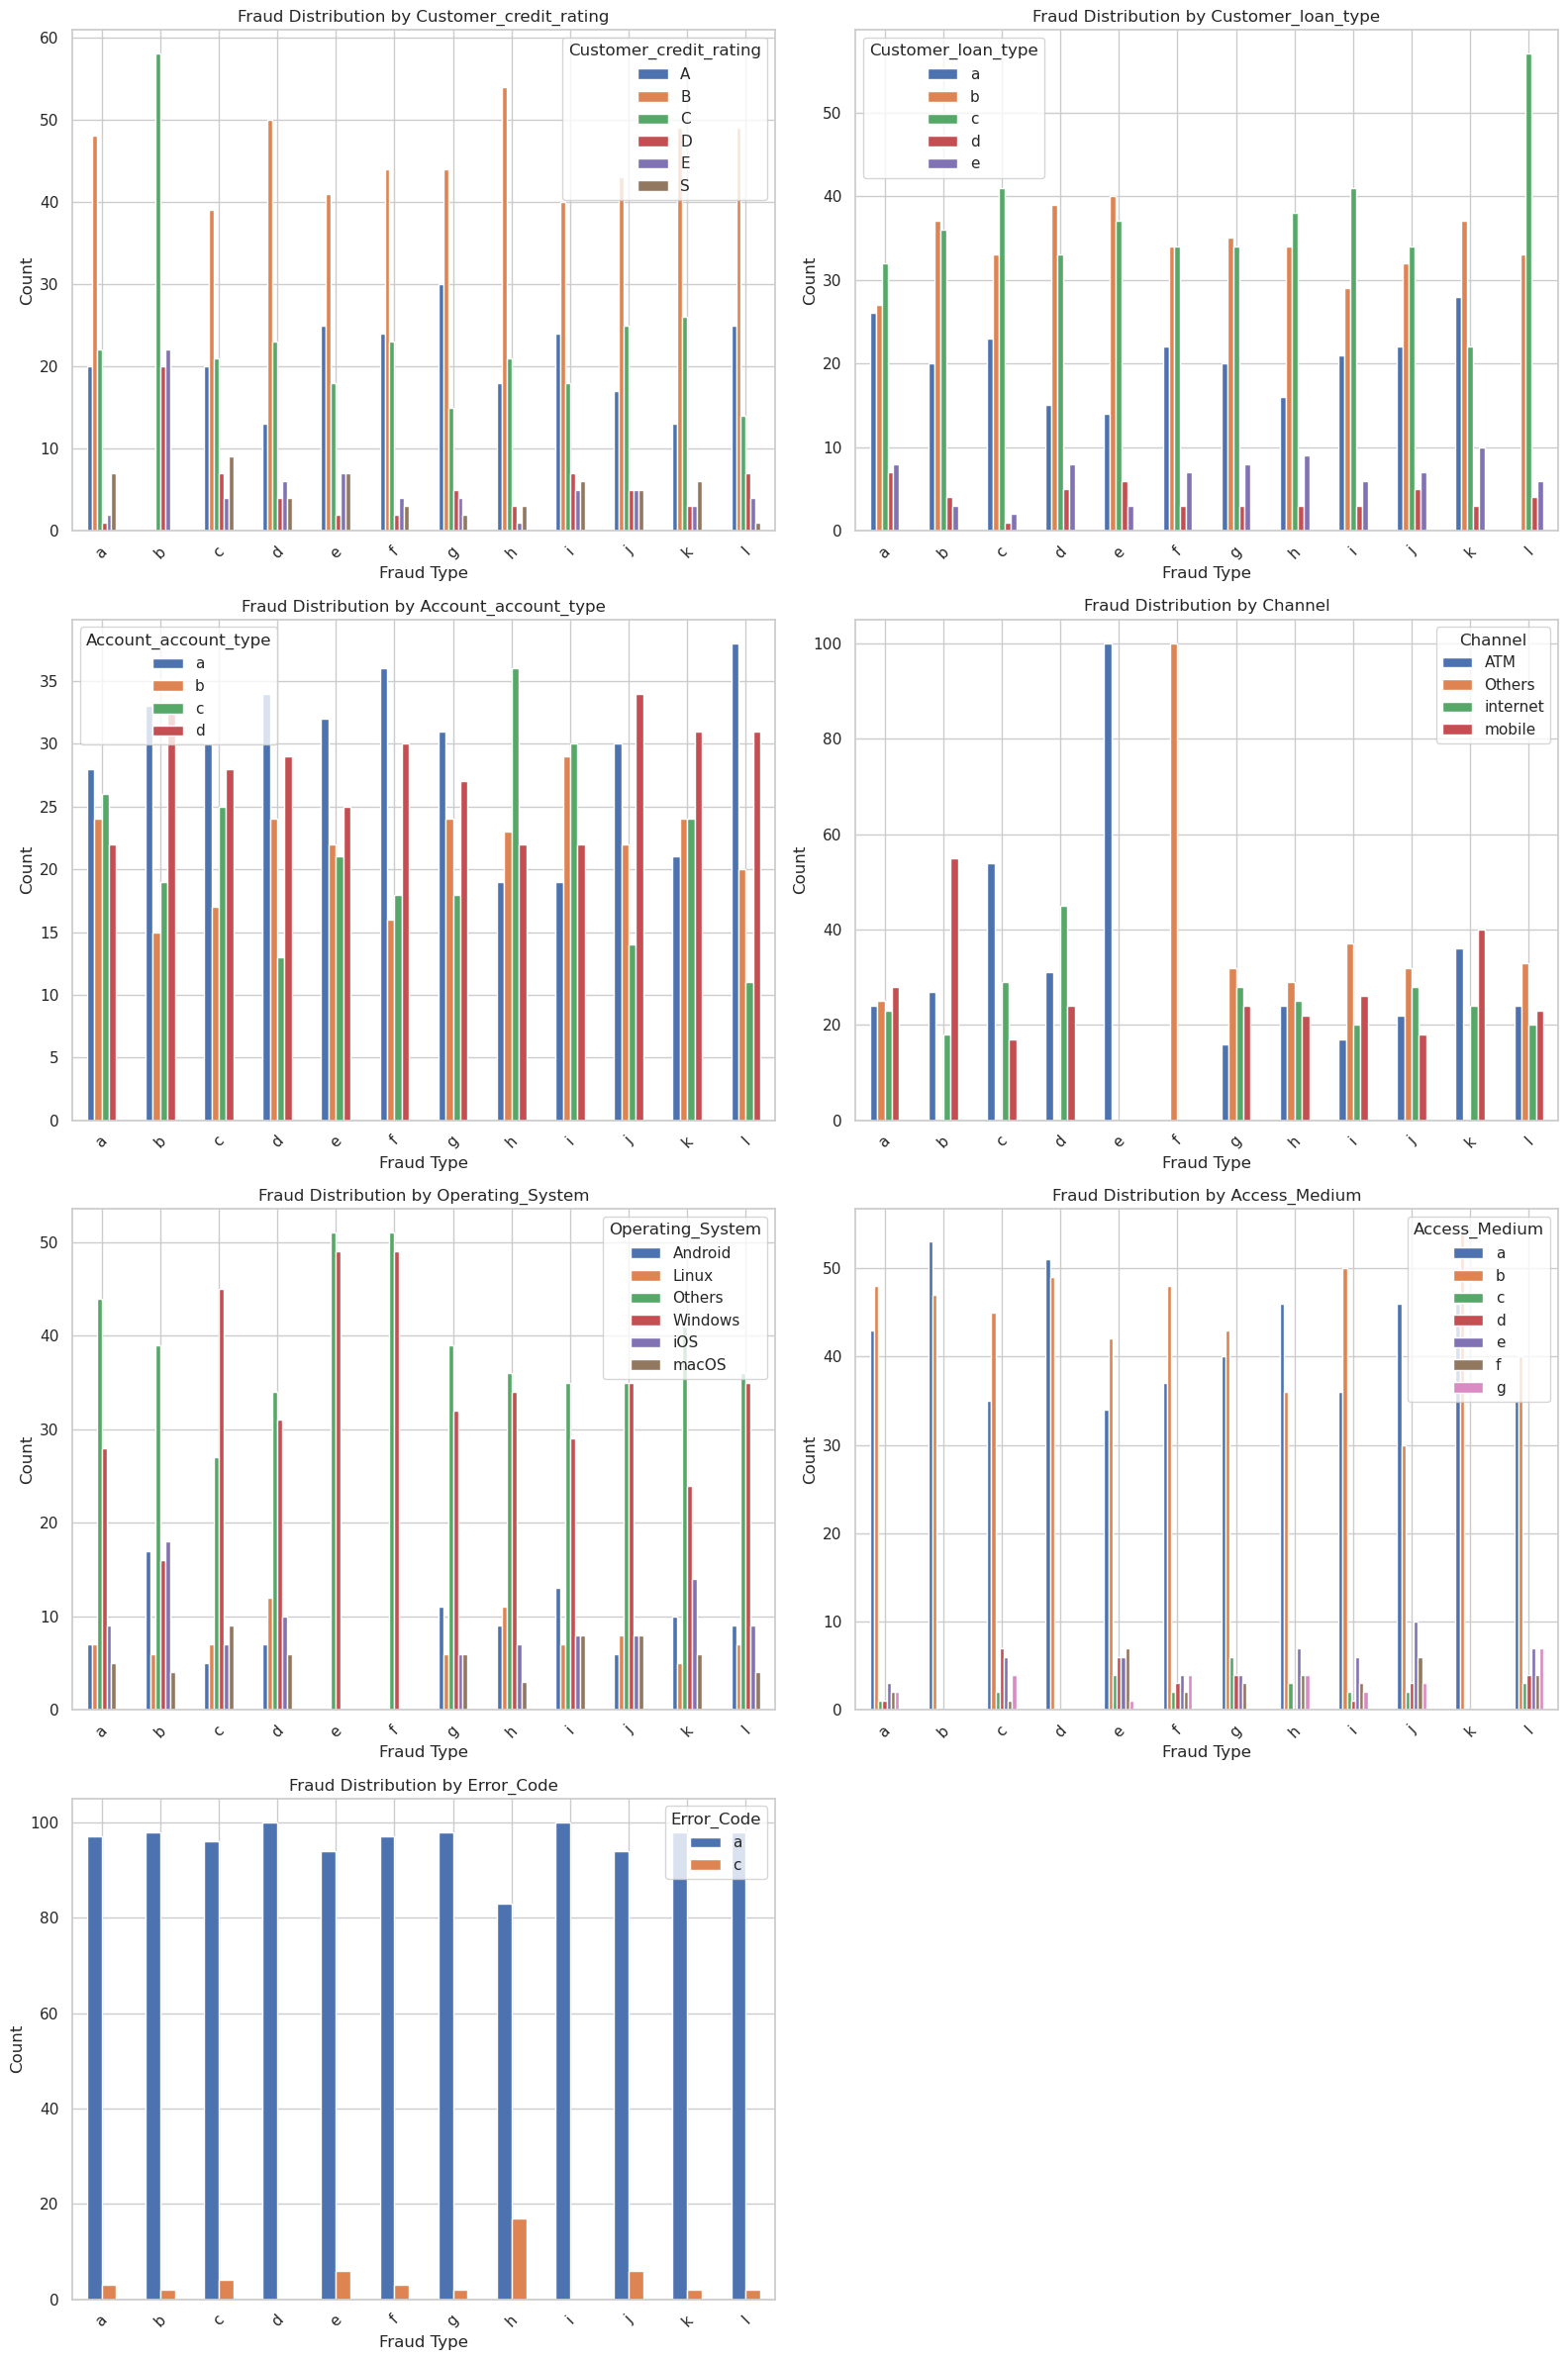

In [72]:

# 데이터프레임에서 'Fraud_Type'이 'm'이 아닌 데이터를 필터링
fraud_df = train_df[train_df['Fraud_Type'] != 'm']

def bar_plot(columns, df):
    # 서브플롯 설정
    num_columns = len(columns)
    num_rows = (num_columns + 1) // 2  # 2열로 배치할 경우 필요한 행 수 계산
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(16, 6 * num_rows))

    # seaborn 스타일 설정
    sns.set_theme(style="whitegrid")

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    for i, col in enumerate(columns):
        # 각 컬럼의 고유한 값을 가져오고 정렬
        values = df[col].unique()
        values.sort()
        
        fraud_distributions = {}

        # 각 값에 대한 Fraud Type 분포를 계산
        for value in values:
            filtered_data = df[df[col] == value]
            fraud_distribution = filtered_data['Fraud_Type'].value_counts()
            fraud_distributions[value] = fraud_distribution

        # 모든 값의 분포를 하나의 데이터프레임으로 결합
        combined_df = pd.DataFrame(fraud_distributions).fillna(0)

        # 막대 그래프 그리기
        combined_df.plot(kind='bar', ax=axes[i])
        axes[i].set_xlabel('Fraud Type')
        axes[i].set_ylabel('Count')
        axes[i].set_title(f'Fraud Distribution by {col}')
        axes[i].set_xticks(range(len(combined_df)))
        axes[i].set_xticklabels(combined_df.index, rotation=45)
        axes[i].grid(True)
        axes[i].legend(title=col)

    # 사용되지 않은 서브플롯 제거
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.savefig('a.png', dpi=300, bbox_inches='tight')
    plt.show()
    
# 카테고리컬 컬럼 목록
categorical_columns = ['Customer_credit_rating', 'Customer_loan_type', 'Account_account_type', 'Channel', 'Operating_System', 'Access_Medium', 'Error_Code']
bar_plot(categorical_columns, fraud_df)

In [29]:
total_df['Channel_OS'] = total_df['Channel'] + "_" + total_df["Operating_System"]
total_df['Channel_OS'].value_counts()

Channel_OS
Others_Windows      31751
Others_Others       31595
ATM_Others          30946
ATM_Windows         30920
mobile_iOS          19507
mobile_Others       19386
mobile_Android      19247
internet_Linux      14229
internet_macOS      14185
internet_Windows    14177
internet_Others     14057
Name: count, dtype: int64

In [30]:
total_df[['Error_Code', 'Transaction_Failure_Status']].drop_duplicates()

,Error_Code,Transaction_Failure_Status
0,a,0
94,c,1


시간 데이터

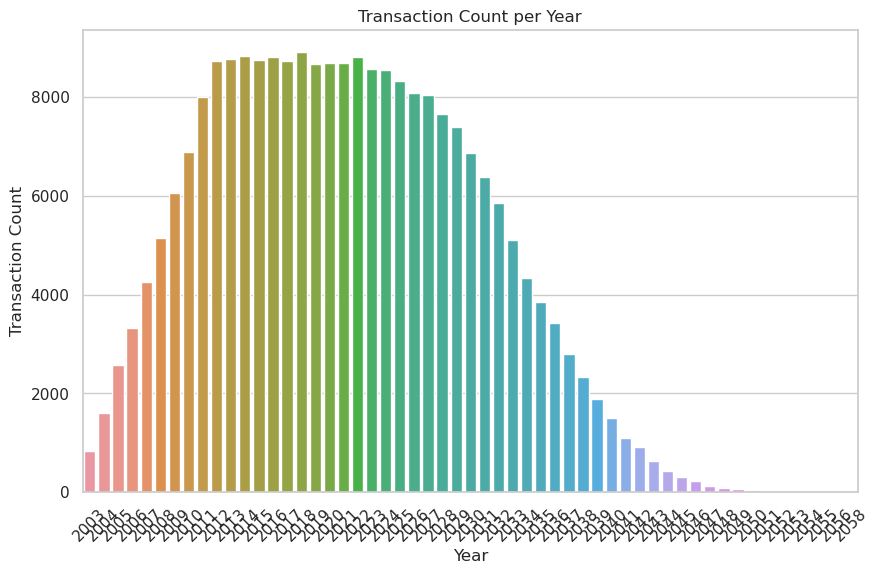

In [61]:
total_df['Transaction_Datetime_year'] = pd.to_datetime(total_df['Transaction_Datetime']).dt.year

# 연도별 거래 횟수를 계산
year_counts = total_df['Transaction_Datetime_year'].value_counts().sort_index()

# 막대 그래프 그리기
plt.figure(figsize=(10,6))
sns.barplot(x=year_counts.index, y=year_counts.values)

# 그래프 제목과 축 라벨 설정
plt.title('Transaction Count per Year')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Transaction Count')

# 그래프 출력
plt.show()

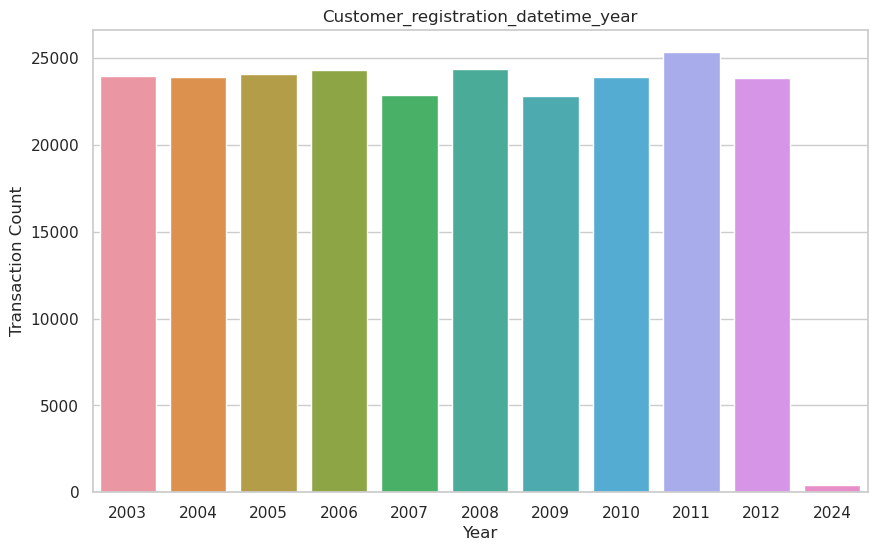

In [63]:
total_df['Customer_registration_datetime_year'] = pd.to_datetime(total_df['Customer_registration_datetime']).dt.year

# 연도별 거래 횟수를 계산
year_counts = total_df['Customer_registration_datetime_year'].value_counts().sort_index()

# 막대 그래프 그리기
plt.figure(figsize=(10,6))
sns.barplot(x=year_counts.index, y=year_counts.values)
sns.set_theme(style="whitegrid")

# 그래프 제목과 축 라벨 설정
plt.title('Customer_registration_datetime_year')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.ylabel('Transaction Count')

# 그래프 출력
plt.show()

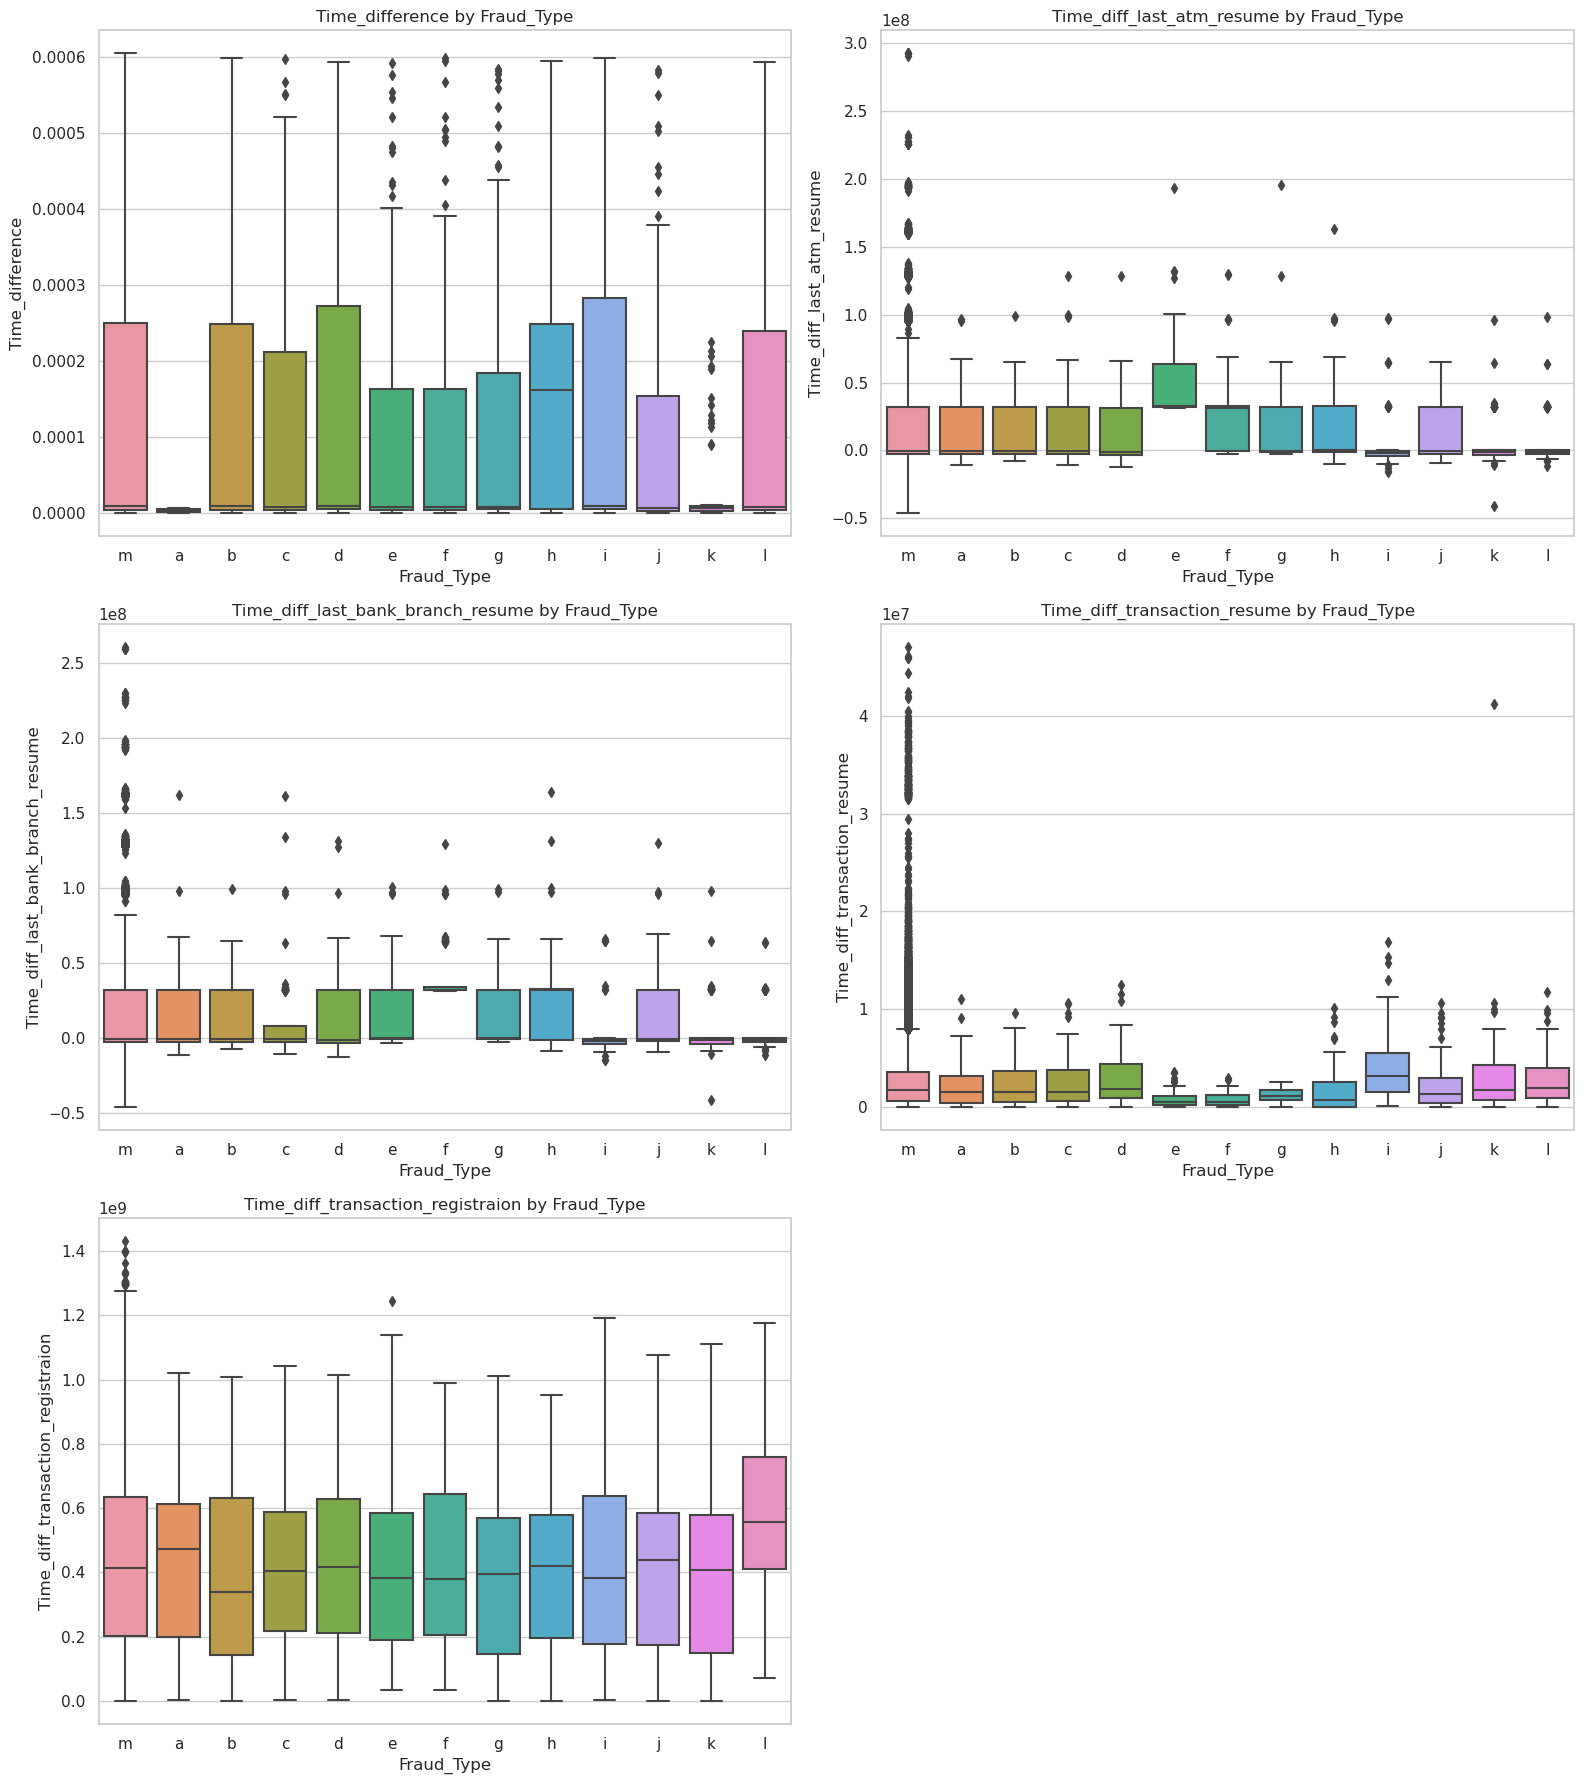

In [70]:
# 마지막 ATM 거래 일자와 거래 재개 일자의 차이
total_df['Time_diff_last_atm_resume'] = pd.to_datetime(total_df['Transaction_resumed_date']) - pd.to_datetime(total_df['Last_atm_transaction_datetime'])
# 마지막 영업점 거래 일자와 거래 재개 일자의 차이
total_df['Time_diff_last_bank_branch_resume'] = pd.to_datetime(total_df['Transaction_resumed_date']) - pd.to_datetime(total_df['Last_bank_branch_transaction_datetime'])
# 거래 일자와 거래 재개 일자 차이
total_df['Time_diff_transaction_resume'] = pd.to_datetime(total_df['Transaction_Datetime']) - pd.to_datetime(total_df['Transaction_resumed_date'])
# 거래 일자와 계좌 개설 일자 차이
total_df['Time_diff_transaction_registraion'] = pd.to_datetime(total_df['Transaction_Datetime']) - pd.to_datetime(total_df['Customer_registration_datetime'])
# 거래 일자 기준 고객 나이
total_df['Transaction_Age'] = pd.to_datetime(total_df['Transaction_Datetime']).dt.year - total_df['Customer_Birthyear']

# datetime 변환
datetime_columns = ['Time_difference', 'Time_diff_last_atm_resume', 'Time_diff_last_bank_branch_resume', 'Time_diff_transaction_resume', 'Time_diff_transaction_registraion']
for col in datetime_columns:
    total_df[col] = pd.to_timedelta(total_df[col], errors='coerce').dt.total_seconds()
    total_df[col] = total_df[col].fillna(0)
    
# Fraud_Type을 a, b, c, ..., m 순서로 정렬
fraud_type_order = ['m', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']
total_df['Fraud_Type'] = pd.Categorical(total_df['Fraud_Type'], categories=fraud_type_order, ordered=True)

def box_plot(columns, df):
    # 서브플롯 설정 (2열)
    num_columns = len(columns)
    num_rows = (num_columns + 1) // 2  # 필요한 행 수 계산
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(16, 6 * num_rows))

    # seaborn 스타일 설정
    sns.set_theme(style="whitegrid")

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # 각 datetime 컬럼에 대해 boxplot 생성
    for i, col in enumerate(columns):
        sns.boxplot(x='Fraud_Type', y=col, data=df, ax=axes[i])
        axes[i].set_title(f'{col} by Fraud_Type')
        axes[i].set_xlabel('Fraud_Type')
        axes[i].set_ylabel(col)

    # 사용되지 않은 서브플롯 제거
    if len(columns) % 2 != 0:
        fig.delaxes(axes[-1])

    plt.tight_layout()
    plt.savefig('a.png', dpi=300, bbox_inches='tight')
    plt.show()
    
box_plot(datetime_columns, total_df)

'Time_difference' 이상치 제거

In [65]:
total_df['Time_difference'].describe()

count    2.400000e+05
mean     6.681910e+05
std      2.017298e+07
min     -1.198136e+09
25%      4.458000e+03
50%      8.862000e+03
75%      2.876072e+05
max      3.214085e+07
Name: Time_difference, dtype: float64

In [66]:
total_df[total_df['Time_difference'] < 0]['Fraud_Type'].value_counts()

Fraud_Type
m    154
a      2
b      0
c      0
d      0
e      0
f      0
g      0
h      0
i      0
j      0
k      0
l      0
Name: count, dtype: int64

In [67]:
total_df[total_df['Time_difference'] > 70000]['Fraud_Type'].value_counts()

Fraud_Type
m    47982
h       56
d       43
i       41
b       38
c       36
g       33
f       30
j       30
l       30
e       29
k       13
a        0
Name: count, dtype: int64

In [68]:
# outlier 처리
non_outliers = total_df[(total_df['Time_difference'] >= 0) & (total_df['Time_difference'] < 700000)]
mean_a = int(non_outliers[non_outliers['Fraud_Type'] == 'a']['Time_difference'].mean())
iqr_75 = int(non_outliers['Time_difference'].quantile(0.75))
total_df['Time_difference'] = total_df['Time_difference'].apply(lambda x: mean_a if x < 0 else x)
total_df['Time_difference'] = total_df['Time_difference'].apply(lambda x: iqr_75 if x > 700000 else x)

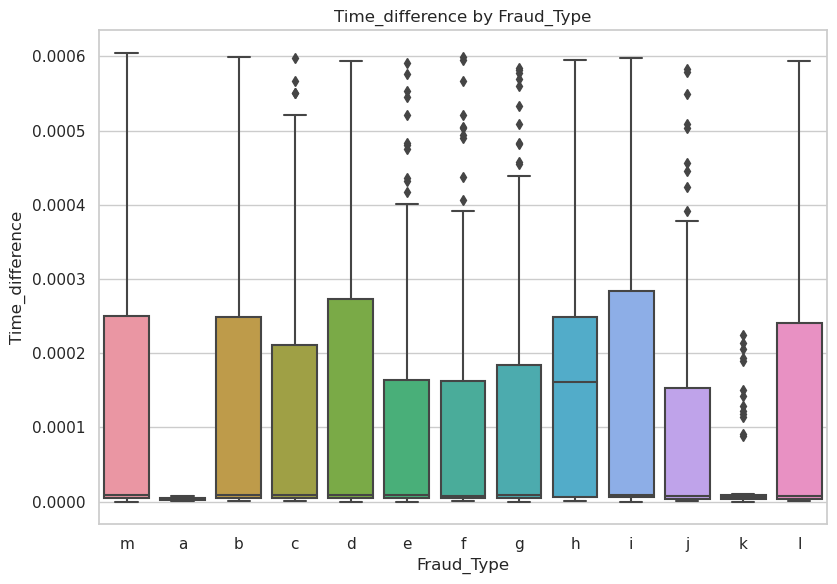

In [71]:
box_plot(['Time_difference'], total_df)

수치형 데이터

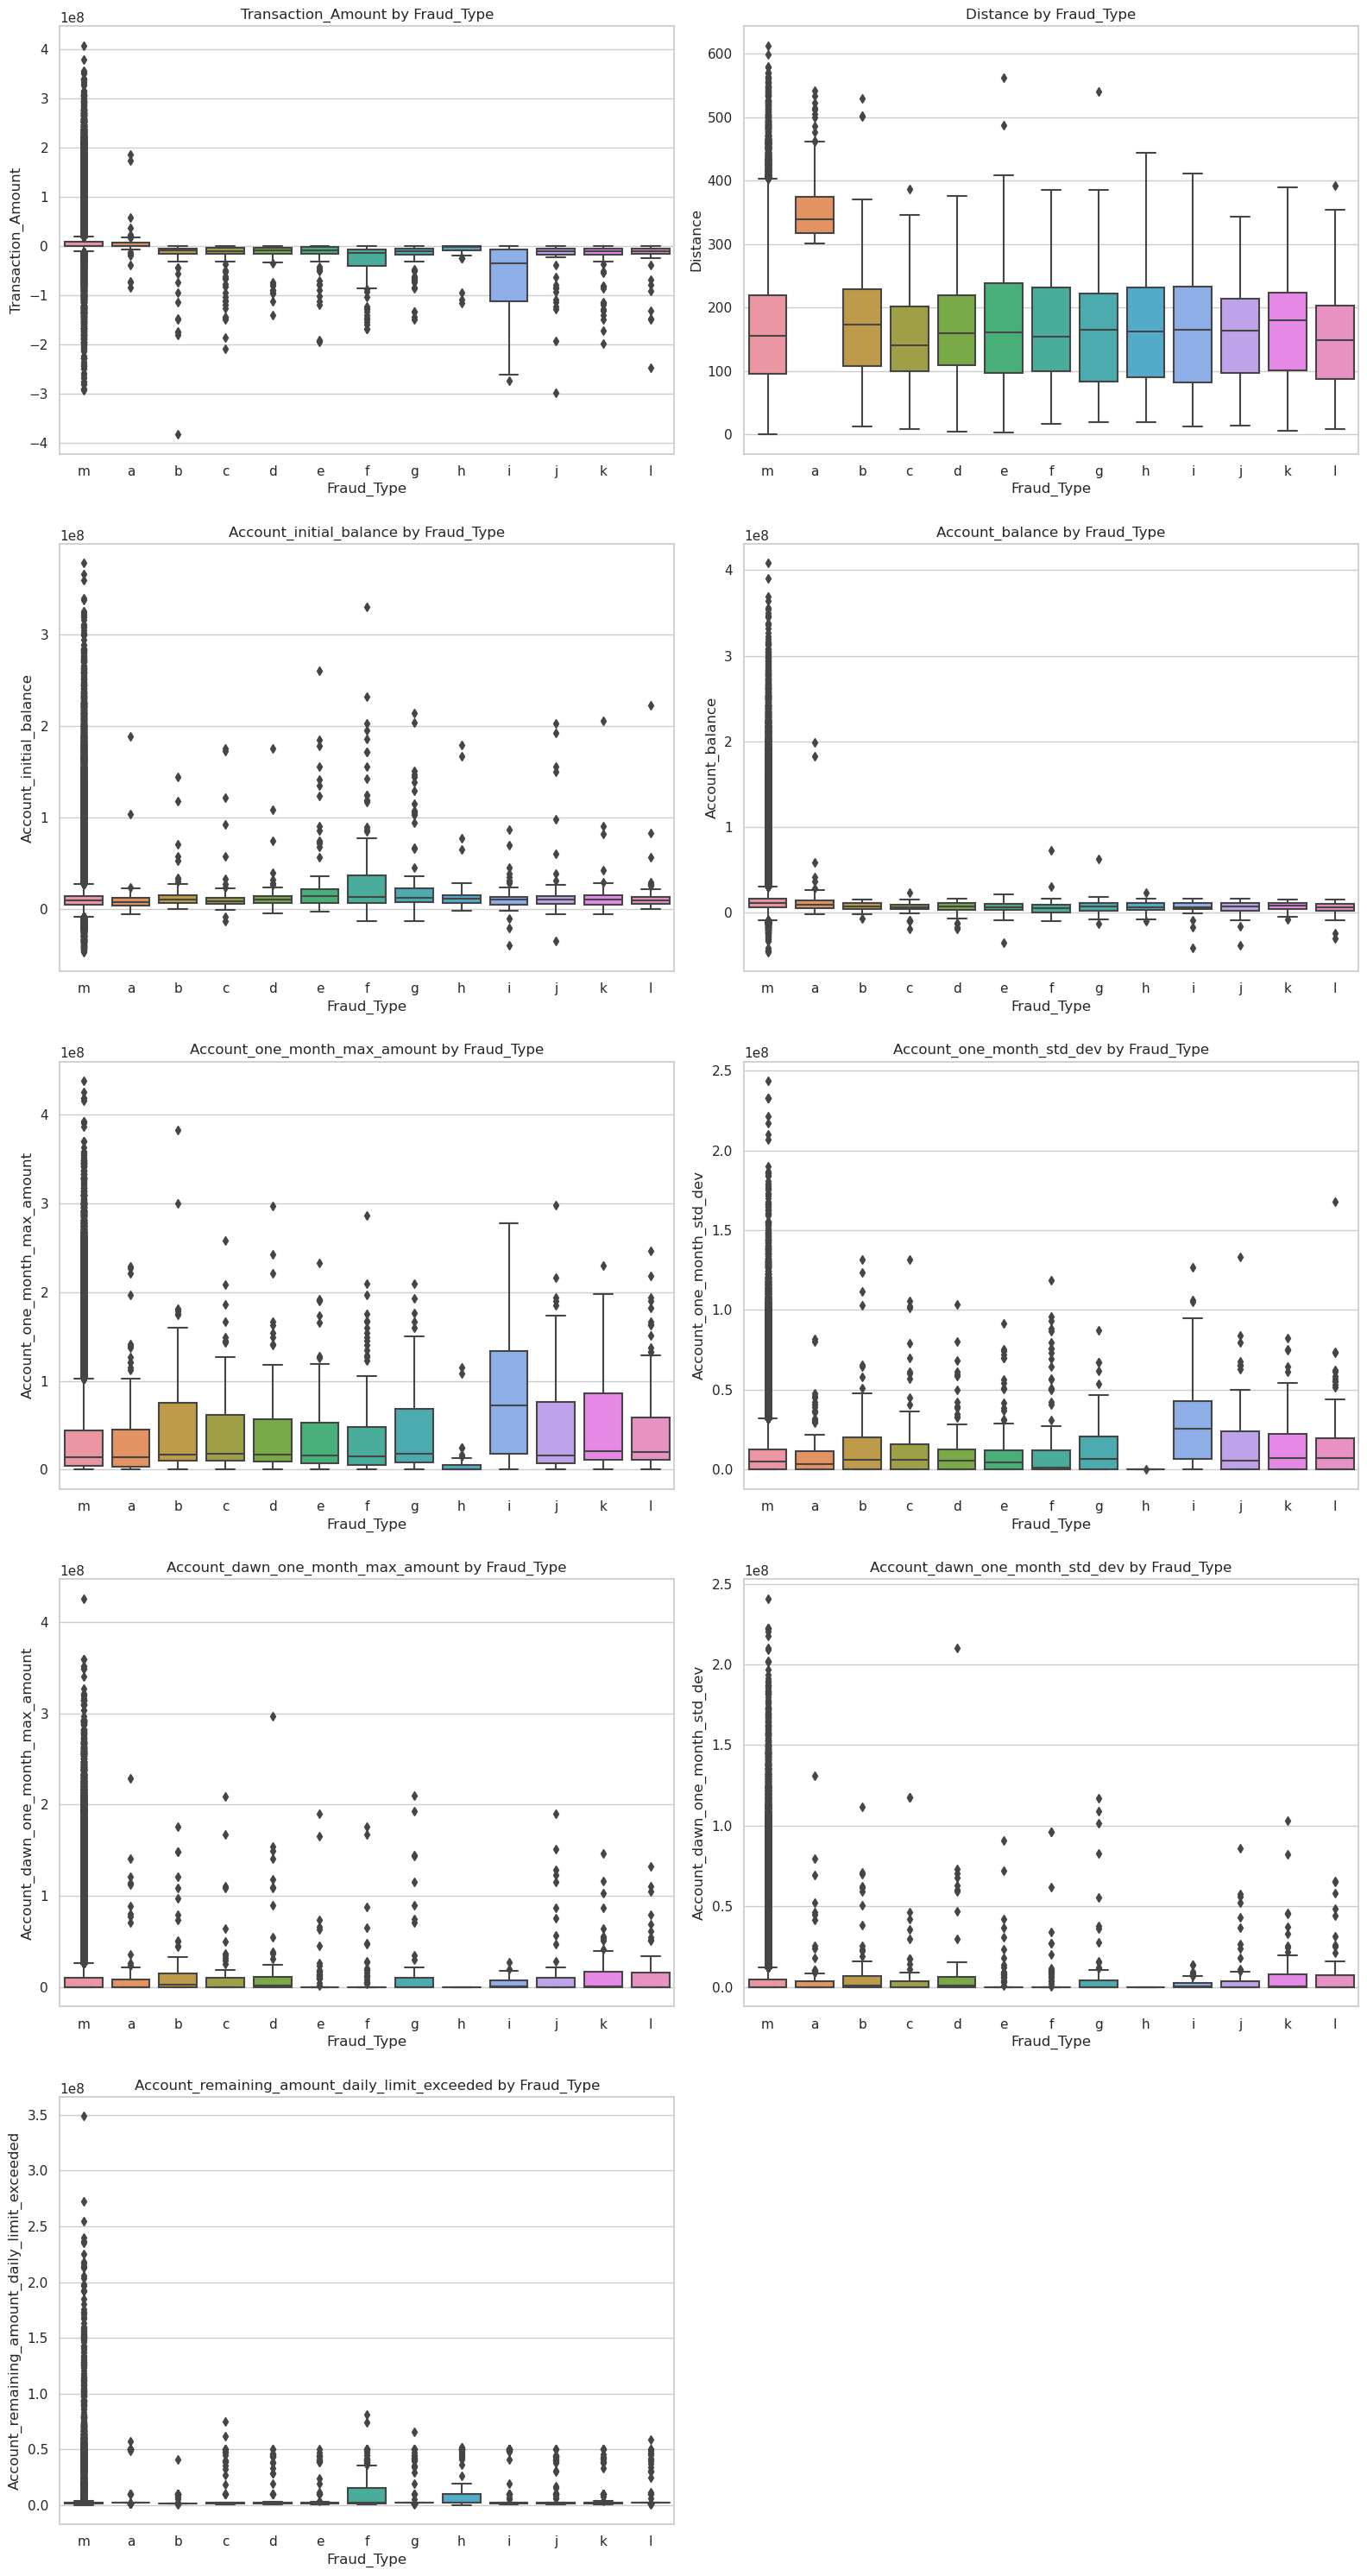

In [85]:
# 거래 일자 기준 나이
box_plot(['Transaction_Amount', 'Distance', 'Account_initial_balance', 'Account_balance', 'Account_one_month_max_amount', 'Account_one_month_std_dev', 'Account_dawn_one_month_max_amount', 'Account_dawn_one_month_std_dev', 'Account_remaining_amount_daily_limit_exceeded'], total_df)

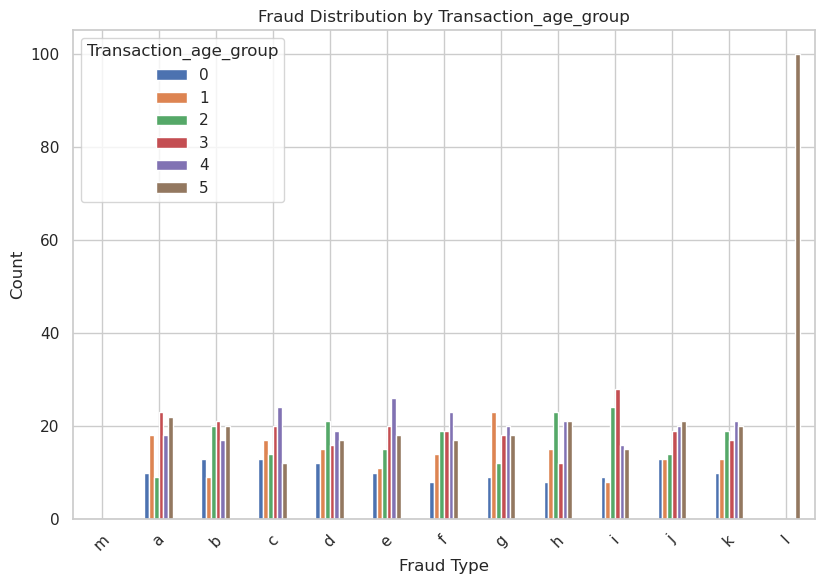

In [80]:
# 거래 일자 기준 나이
total_df['Transaction_Age'] = pd.to_datetime(total_df['Transaction_Datetime']).dt.year - total_df['Customer_Birthyear']
total_df['Transaction_age_group'] = pd.cut(total_df['Transaction_Age'], bins=[-1, 19, 29, 39, 49, 59, 99], labels=[0, 1, 2, 3, 4, 5])
total_df['Transaction_age_group'] = total_df['Transaction_age_group'].astype(int)
bar_plot(['Transaction_age_group'], total_df[total_df['Fraud_Type'] != 'm'])

In [81]:
total_df['Account_amount_daily_limit'].value_counts()

Account_amount_daily_limit
2000000     131312
1000000      60065
50000000     33511
10000000     15112
Name: count, dtype: int64

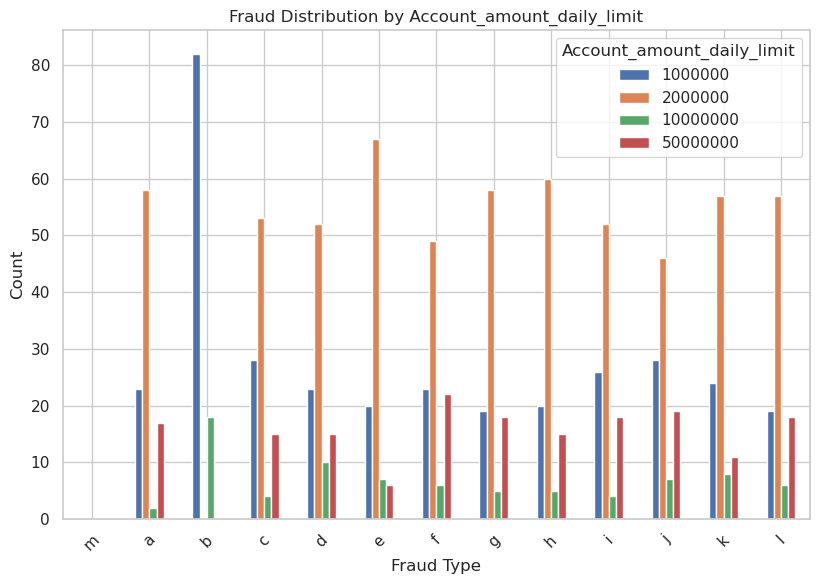

In [83]:
bar_plot(['Account_amount_daily_limit'], total_df[total_df['Fraud_Type'] != 'm'])

이진 데이터

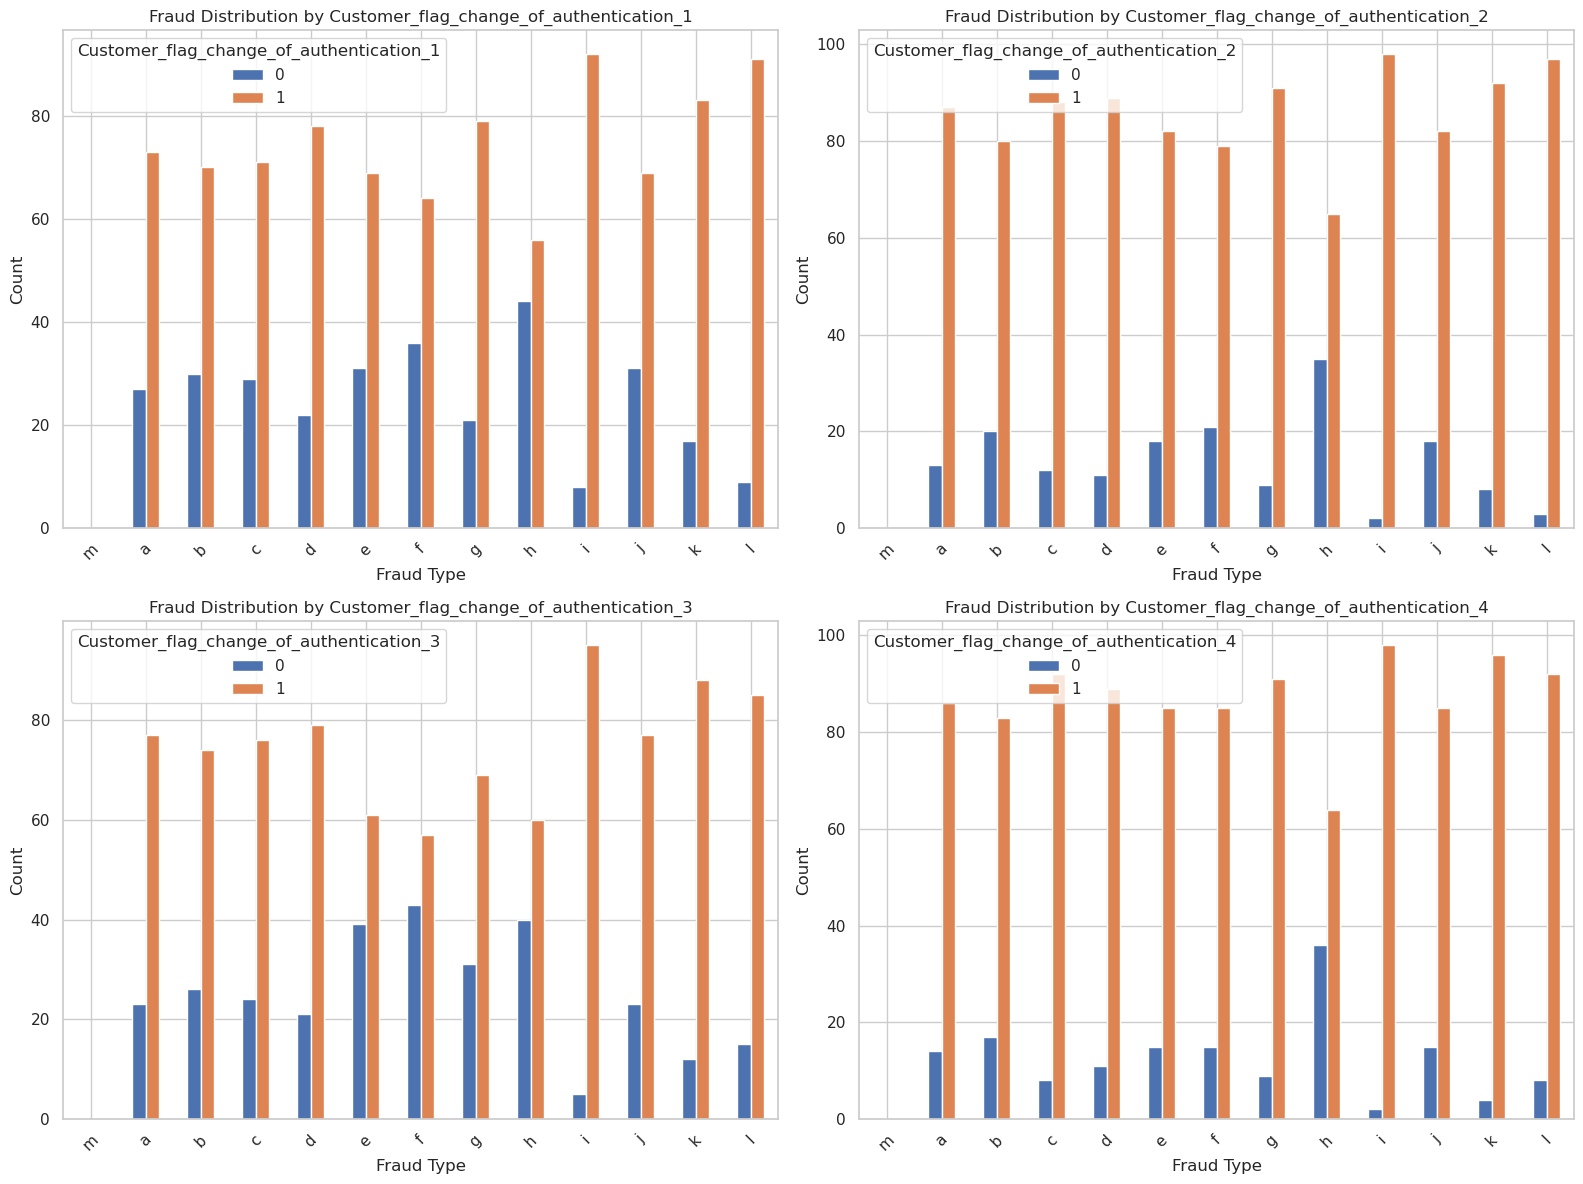

In [42]:
bar_plot(['Customer_flag_change_of_authentication_1', 'Customer_flag_change_of_authentication_2', 'Customer_flag_change_of_authentication_3', 'Customer_flag_change_of_authentication_4'], total_df[total_df['Fraud_Type'] != 'm'])

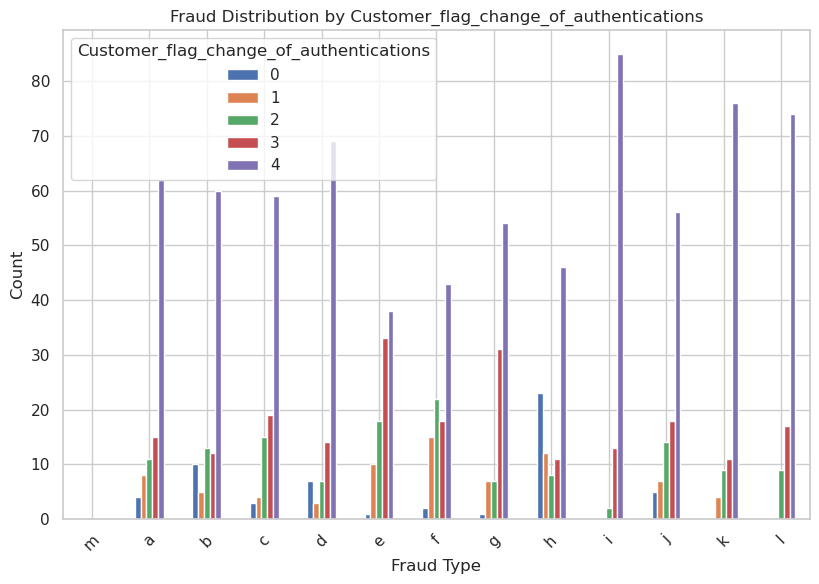

In [86]:
total_df['Customer_flag_change_of_authentications'] = total_df['Customer_flag_change_of_authentication_1'] + total_df['Customer_flag_change_of_authentication_2'] + total_df['Customer_flag_change_of_authentication_3'] + total_df['Customer_flag_change_of_authentication_4']
bar_plot(['Customer_flag_change_of_authentications'], total_df[total_df['Fraud_Type'] != 'm'])

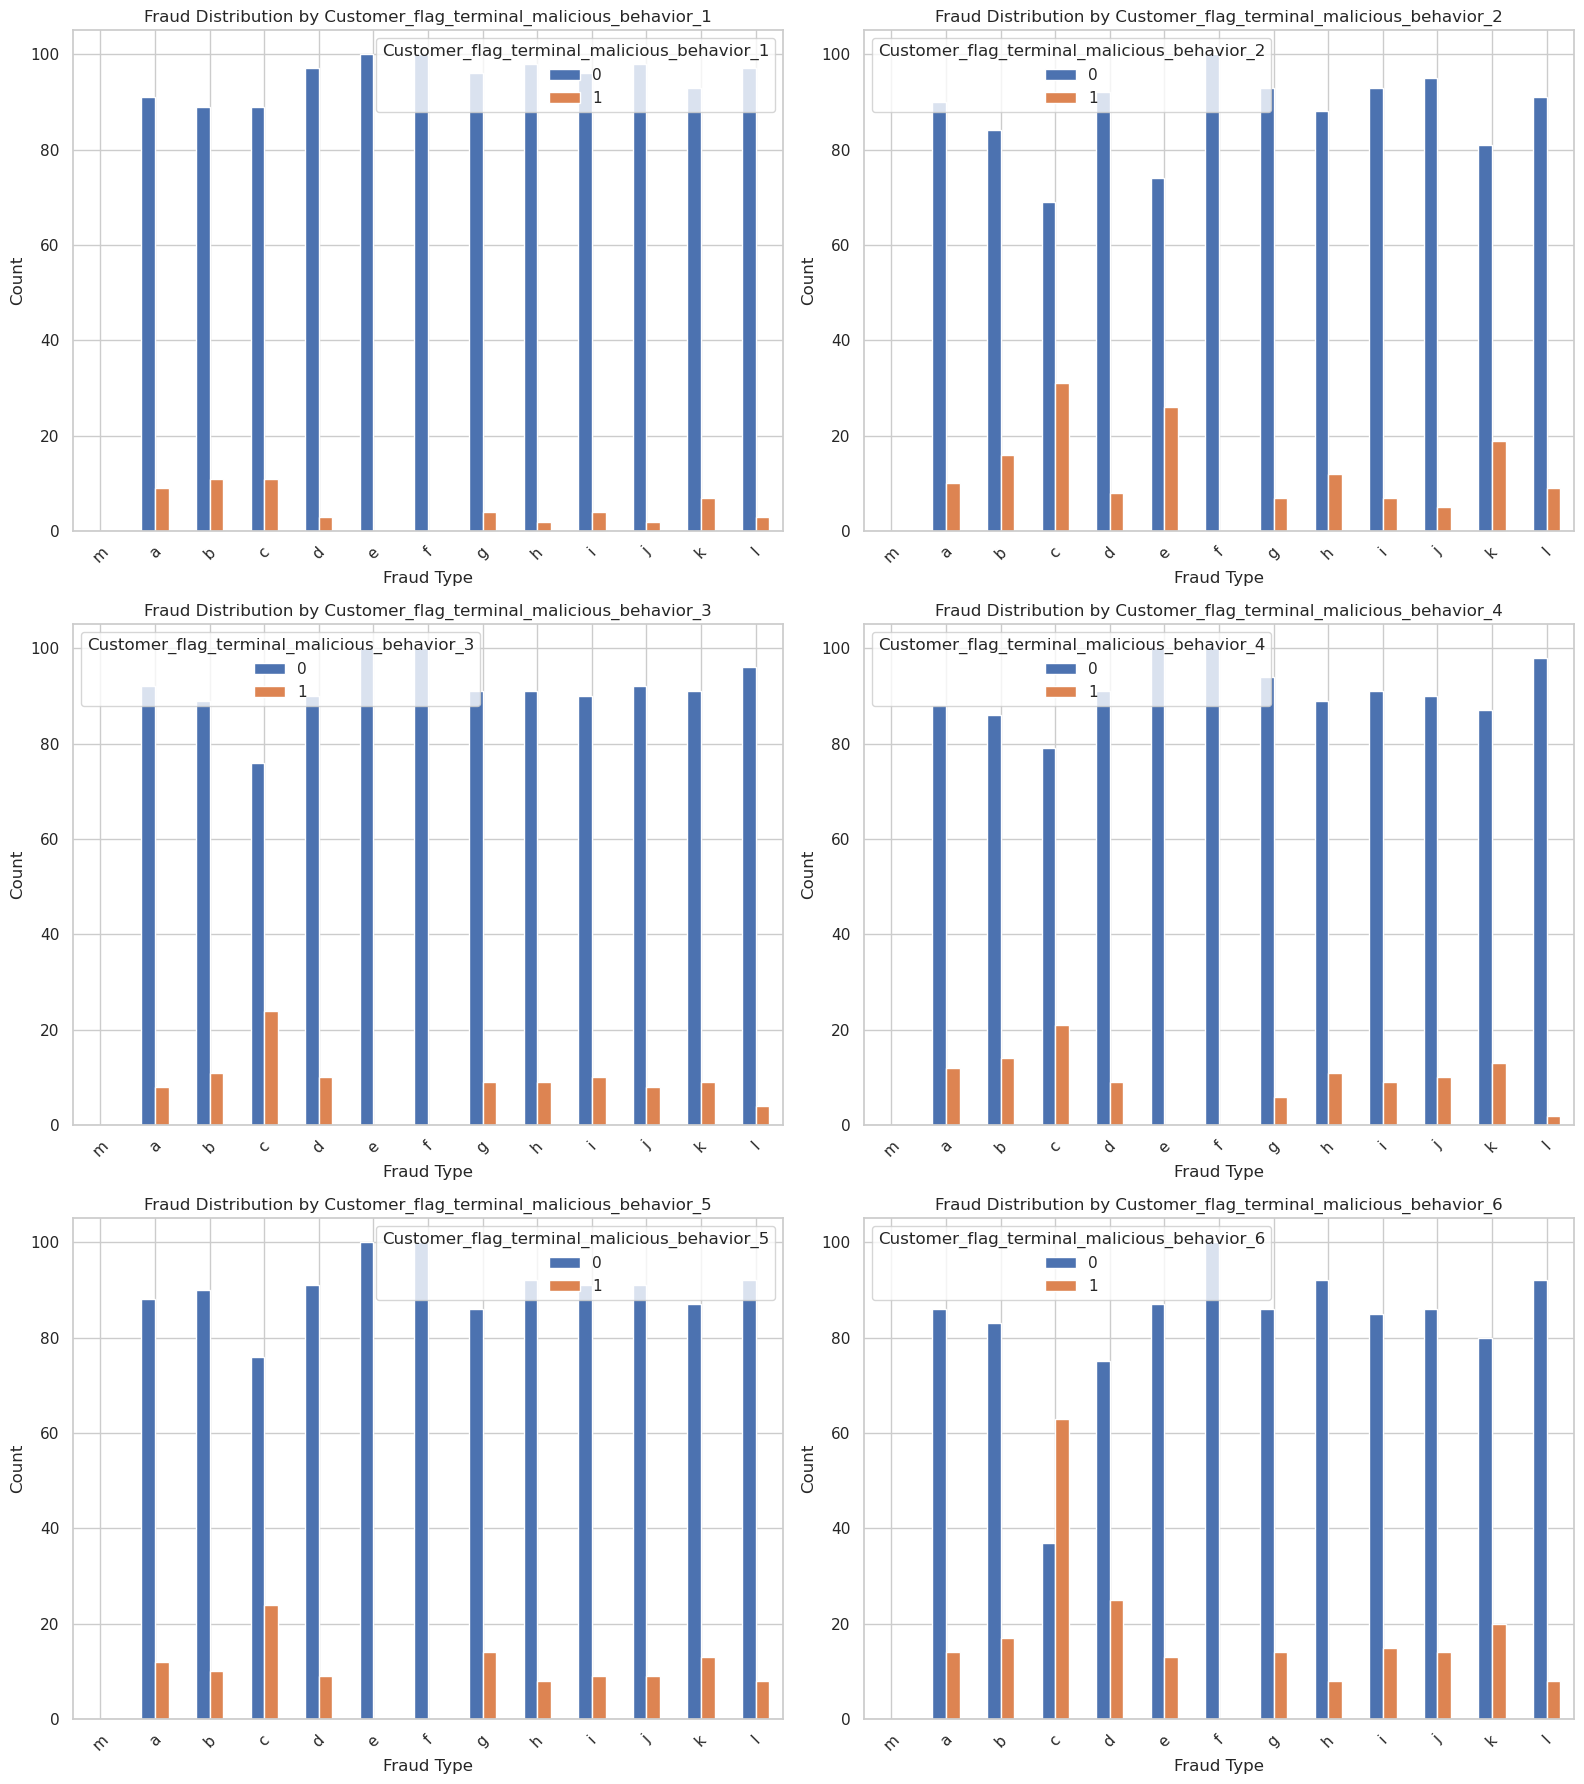

In [87]:
bar_plot(['Customer_flag_terminal_malicious_behavior_1', 'Customer_flag_terminal_malicious_behavior_2', 'Customer_flag_terminal_malicious_behavior_3', 'Customer_flag_terminal_malicious_behavior_4', 'Customer_flag_terminal_malicious_behavior_5', 'Customer_flag_terminal_malicious_behavior_6'], total_df[total_df['Fraud_Type'] != 'm'])

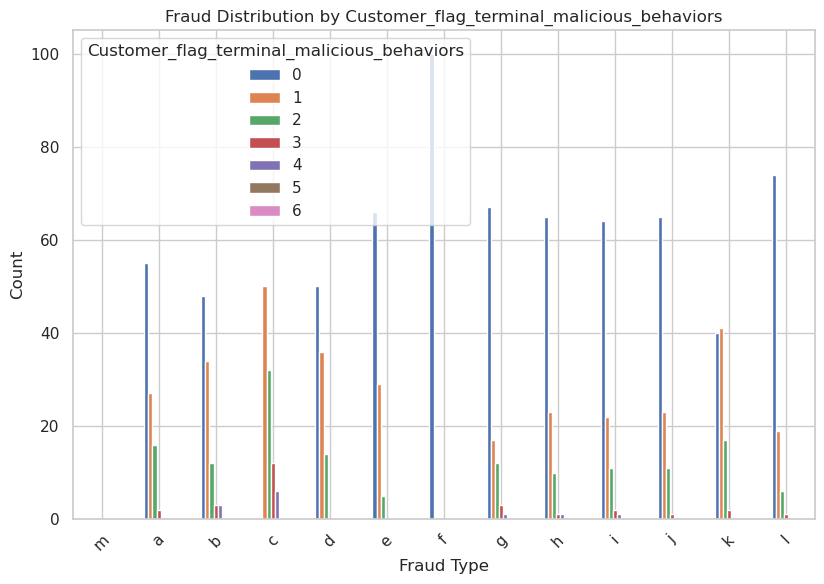

In [88]:
total_df['Customer_flag_terminal_malicious_behaviors'] = total_df['Customer_flag_terminal_malicious_behavior_1'] + total_df['Customer_flag_terminal_malicious_behavior_2'] + total_df['Customer_flag_terminal_malicious_behavior_3'] + total_df['Customer_flag_terminal_malicious_behavior_4'] + total_df['Customer_flag_terminal_malicious_behavior_5'] + total_df['Customer_flag_terminal_malicious_behavior_6']
bar_plot(['Customer_flag_terminal_malicious_behaviors'], total_df[total_df['Fraud_Type'] != 'm'])

/tmp/ipykernel_5784/2109919287.py:46: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/tmp/ipykernel_5784/2109919287.py:47: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('a.png', dpi=300, bbox_inches='tight')
/tmp/ipykernel_5784/2109919287.py:47: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('a.png', dpi=300, bbox_inches='tight')


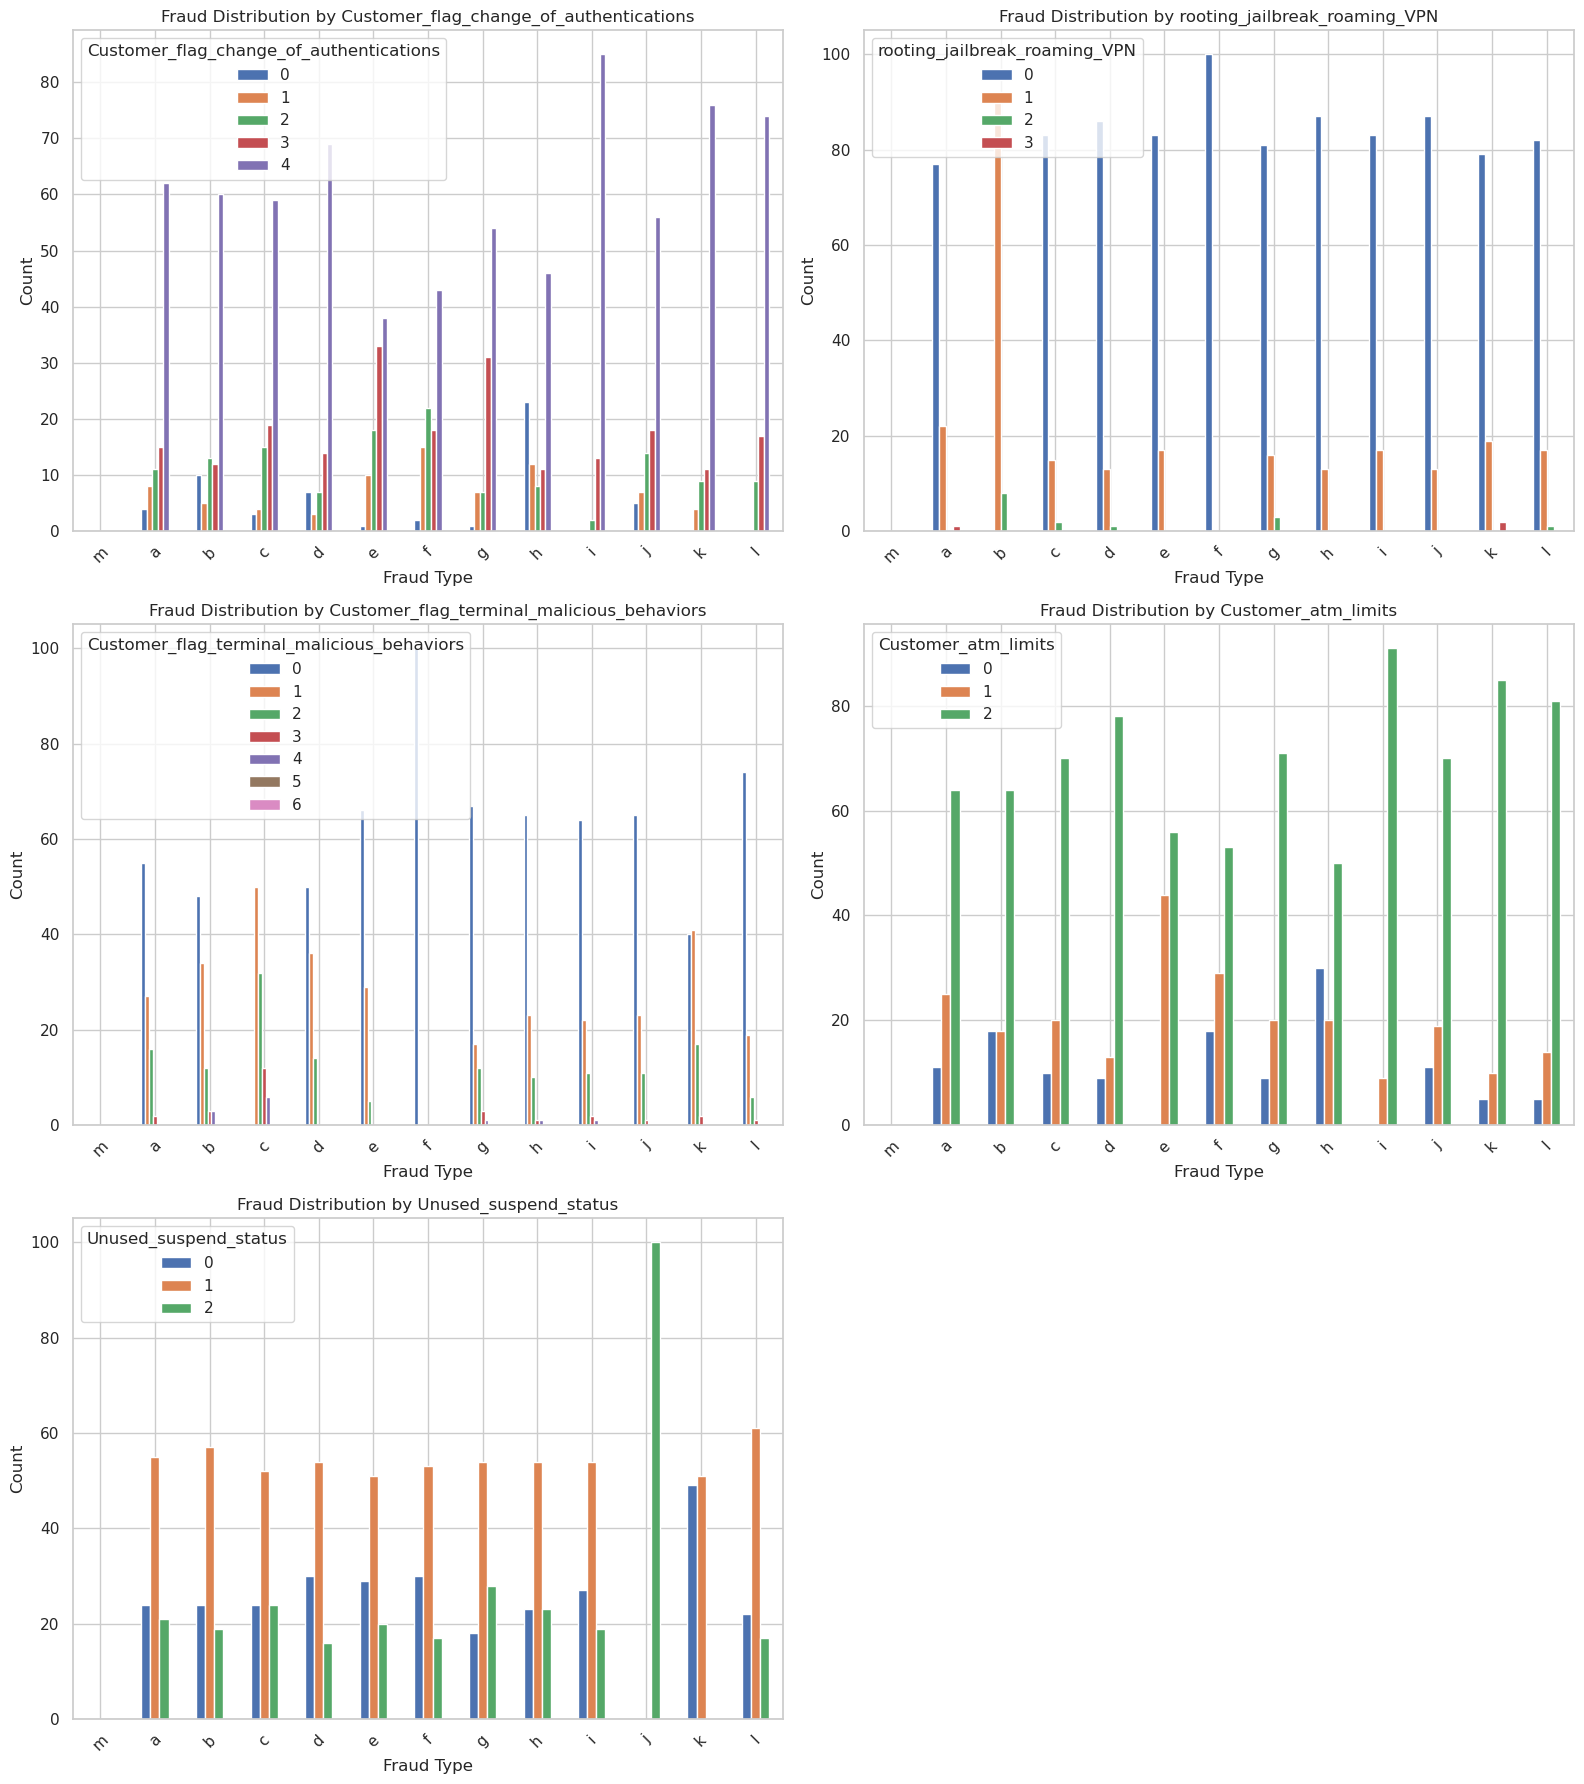

In [89]:
total_df['rooting_jailbreak_roaming_VPN'] = total_df['Customer_rooting_jailbreak_indicator'] + total_df['Customer_mobile_roaming_indicator'] + total_df['Customer_VPN_Indicator']
total_df['Customer_atm_limits'] = total_df['Customer_inquery_atm_limit'] + total_df['Customer_increase_atm_limit']
total_df['Unused_suspend_status'] = total_df['Unused_account_status'] + total_df['Recipient_account_suspend_status']

bar_plot(['Customer_flag_change_of_authentications', 'rooting_jailbreak_roaming_VPN', 'Customer_flag_terminal_malicious_behaviors', 'Customer_atm_limits', 'Unused_suspend_status'], total_df[total_df['Fraud_Type'] != 'm'])